In [1]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.optimizers import SGD

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Softmax
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Reshape, GlobalAveragePooling2D, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt

import pandas as pd
import datetime

Using TensorFlow backend.


In [2]:

# Hyperparameters
batch_size = 64
num_classes = 10 #pegar automaticamente NumPy.Unique
epochs = 200



In [3]:
# Load Cifar-10 Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Adicionando Canal do DataSet (Channel do MNIST eh 1)
x_train = np.reshape(x_train, (len(x_train),28,28, 1))
x_test = np.reshape(x_test, (len(x_test),28,28, 1))


#x_train.shape
img_height, img_width, channel = x_train.shape[1],x_train.shape[2],x_train.shape[3]
#channel=1

x_train.shape



(60000, 28, 28, 1)

In [4]:

#
x_train.shape

#


(60000, 28, 28, 1)

In [5]:
# convert to one hot encoing 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



In [6]:
img_width

28

In [7]:
model = Sequential()

#Filters = IMG_width/2 * 7
model.add(Conv2D(98, #alterado de 168 para 98
                 (5,5), #alterado de 3 para 5 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))

#Normalization:
#calculo da quantidade de filtros da normalização:
# Width*heigth da saída após a primeira camada de convolução+pooling
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 data_format='channels_last'))
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))
model.add(Dropout(0.5))

#Pooling
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))



#Filters = IMG_width/2 * 9
model.add(Conv2D(126, 
                 (5,5), 
                 strides=(2,2), 
                 activation='relu', 
                 padding='same',
                 data_format='channels_last',
                 use_bias=True, 
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None), 
                 bias_initializer='zeros',
                 input_shape=(img_height, img_width, channel)))
#Normalization:
#calculo da quantidade de filtros da normalização:
# Width*heigth da saída após a primeira camada de convolução+pooling
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))
model.add(Conv2D(49, 
                 (1,1), 
                 strides=(1,1), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer=RandomNormal(mean=0.0, stddev=0.05, seed=None),                  
                 data_format='channels_last'))
model.add(Dropout(0.5))

#Pooling
model.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))


model.add(Flatten())
#IMG_width^ 2
model.add(Dense(784, activation='relu'))
model.add(Dropout(0.5))

#camada anterior/2
model.add(Dense(392, activation='relu'))
model.add(Dropout(0.5))

#Num de classes
model.add(Dense(10, activation='softmax'))


In [8]:

# print the model summary
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 98)        2548      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 49)        4851      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 49)        2450      
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 49)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 49)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 126)         154476    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 49)          6223      
__________

In [9]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, momentum=0.02, decay=0.0, nesterov=False),
              metrics=['accuracy'])


In [10]:

# Train the Model
#earlyStopping=keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=13, verbose=1, mode='auto')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
#                    callbacks=[earlyStopping],
                    validation_data=(x_test, y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 56s 928us/step - loss: 1.3739 - acc: 0.5081 - val_loss: 0.5017 - val_acc: 0.8889
Epoch 2/200
60000/60000 [==============================] - 97s 2ms/step - loss: 0.3316 - acc: 0.9003 - val_loss: 0.1807 - val_acc: 0.9642
Epoch 3/200
60000/60000 [==============================] - 100s 2ms/step - loss: 0.2219 - acc: 0.9351 - val_loss: 0.1250 - val_acc: 0.9740
Epoch 4/200
60000/60000 [==============================] - 100s 2ms/step - loss: 0.1712 - acc: 0.9497 - val_loss: 0.1056 - val_acc: 0.9771
Epoch 5/200
60000/60000 [==============================] - 100s 2ms/step - loss: 0.1467 - acc: 0.9571 - val_loss: 0.1647 - val_acc: 0.9685
Epoch 6/200
60000/60000 [==============================] - 100s 2ms/step - loss: 0.1279 - acc: 0.9628 - val_loss: 0.0808 - val_acc: 0.9820
Epoch 7/200
60000/60000 [==============================] - 100s 2ms/step - loss: 0.1158 - acc: 0.9664 - val_loss: 0.

60000/60000 [==============================] - 101s 2ms/step - loss: 0.0293 - acc: 0.9912 - val_loss: 0.0323 - val_acc: 0.9920
Epoch 60/200
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0299 - acc: 0.9909 - val_loss: 0.0321 - val_acc: 0.9921
Epoch 61/200
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0281 - acc: 0.9914 - val_loss: 0.0292 - val_acc: 0.9930
Epoch 62/200
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0296 - acc: 0.9915 - val_loss: 0.0293 - val_acc: 0.9925
Epoch 63/200
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0270 - acc: 0.9916 - val_loss: 0.0304 - val_acc: 0.9923
Epoch 64/200
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0259 - acc: 0.9925 - val_loss: 0.0274 - val_acc: 0.9932
Epoch 65/200
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0273 - acc: 0.9915 - val_loss: 0.0315 - val_acc: 0.9927
Epoch 66/200
60000/60000 [========

60000/60000 [==============================] - 101s 2ms/step - loss: 0.0153 - acc: 0.9951 - val_loss: 0.0215 - val_acc: 0.9939
Epoch 118/200
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0183 - acc: 0.9947 - val_loss: 0.0244 - val_acc: 0.9933
Epoch 119/200
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0179 - acc: 0.9945 - val_loss: 0.0223 - val_acc: 0.9938
Epoch 120/200
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0157 - acc: 0.9954 - val_loss: 0.0231 - val_acc: 0.9937
Epoch 121/200
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0164 - acc: 0.9951 - val_loss: 0.0253 - val_acc: 0.9928
Epoch 122/200
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0149 - acc: 0.9954 - val_loss: 0.0220 - val_acc: 0.9932
Epoch 123/200
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0152 - acc: 0.9953 - val_loss: 0.0212 - val_acc: 0.9937
Epoch 124/200
60000/60000 [

60000/60000 [==============================] - 100s 2ms/step - loss: 0.0106 - acc: 0.9967 - val_loss: 0.0208 - val_acc: 0.9939
Epoch 176/200
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0107 - acc: 0.9967 - val_loss: 0.0213 - val_acc: 0.9941
Epoch 177/200
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0100 - acc: 0.9970 - val_loss: 0.0205 - val_acc: 0.9943
Epoch 178/200
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0109 - acc: 0.9966 - val_loss: 0.0215 - val_acc: 0.9934
Epoch 179/200
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0108 - acc: 0.9964 - val_loss: 0.0222 - val_acc: 0.9935
Epoch 180/200
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0114 - acc: 0.9966 - val_loss: 0.0216 - val_acc: 0.9935
Epoch 181/200
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0110 - acc: 0.9963 - val_loss: 0.0254 - val_acc: 0.9926
Epoch 182/200
60000/60000 [=

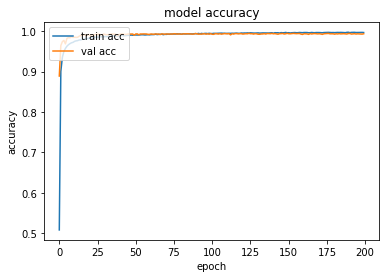

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train acc','val acc'], loc='upper left')
plt.show()

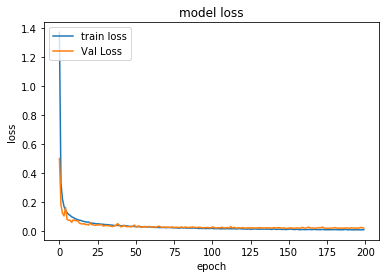

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','Val Loss'], loc='upper left')
plt.show()

In [13]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.020924600178
Test accuracy: 0.9935


In [14]:
print(history.history)

{'val_loss': [0.50174464502334593, 0.18071965031623841, 0.12497882691025734, 0.10556106217503548, 0.16470163841247559, 0.080847257126867772, 0.076259505516290668, 0.075876217073202135, 0.061502750273048877, 0.078978660917282104, 0.074748550045490261, 0.072216487932205198, 0.073085328543186182, 0.056354746977239849, 0.05227510609328747, 0.049849504834413527, 0.052635007171332834, 0.04607348812445998, 0.047236074259877206, 0.042258942720293999, 0.058157702922821047, 0.046036343470215797, 0.045270083647966385, 0.03993674049898982, 0.042400337394326928, 0.044863670816272495, 0.041980873441696168, 0.045207618126273157, 0.041758849067986013, 0.034730917849950492, 0.040770934121310713, 0.038665981622040269, 0.039040028953552249, 0.035291366613656283, 0.034562231995165345, 0.032788333548605442, 0.037777480264753104, 0.039719711498171092, 0.05318047375231981, 0.043378429178893563, 0.031352409524843097, 0.031663887315616014, 0.041090355060994628, 0.03409420510344207, 0.031708580187894402, 0.0317

In [15]:

data = pd.DataFrame(history.history)
nome = 'DoubleConvMNISTNormDropDesloc_t1' + str(datetime.datetime.now())+'.json'
data = data.to_json()
with open(nome, "w+") as output_file:
    output_file.write(data)